<a href="https://colab.research.google.com/github/dtphuong2612/Machine_Learning_02/blob/main/homework02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Xây dựng lại bài toán t-SNE. Tính đạo hàm loss với các parameter (y) trong bài toán t-SNE



The values of $p_{i i}$ and $q_{i i}$ are set to zero. The Kullback-Leibler divergence between the two joint probability distributions $P$ and $Q$ is given by
$$
\begin{aligned}
C=K L(P \| Q) &=\sum_{i} \sum_{j} p_{i j} \log \frac{p_{i j}}{q_{i j}} \\
&=\sum_{i} \sum_{j} p_{i j} \log p_{i j}-p_{i j} \log q_{i j}
\end{aligned}
$$
In order to make the derivation less cluttered, we define two auxiliary variables $d_{i j}$ and $Z$ as follows
$$
\begin{array}{c}
d_{i j}=\left\|y_{i}-y_{j}\right\|, \\
Z=\sum_{k \neq l}\left(1+d_{k l}^{2}\right)^{-1} .
\end{array}
$$
Note that if $y_{i}$ changes, the only pairwise distances that change are $d_{i j}$ and $d_{j i}$ for $\forall j$. Hence, the gradient of the cost function $C$ with respect to $y_{i}$ is given by
$$
\begin{aligned}
\frac{\delta C}{\delta y_{i}} &=\sum_{j}\left(\frac{\delta C}{\delta d_{i j}}+\frac{\delta C}{\delta d_{j i}}\right)\left(y_{i}-y_{j}\right) \\
&=2 \sum_{j} \frac{\delta C}{\delta d_{i j}}\left(y_{i}-y_{j}\right)
\end{aligned}
$$
The gradient $\frac{\delta C}{\delta d_{i}}$ is computed from the definition of the Kullback-Leibler divergence in Equation 6 (note that the first part of this equation is a constant).
$$
\begin{aligned}
\frac{\delta C}{\delta d_{i j}} &=-\sum_{k \neq l} p_{k l} \frac{\delta\left(\log q_{k l}\right)}{\delta d_{i j}} \\
&=-\sum_{k \neq l} p_{k l} \frac{\delta\left(\log q_{k l} Z-\log Z\right)}{\delta d_{i j}} \\
&=-\sum_{k \neq l} p_{k l}\left(\frac{1}{q_{k l} Z} \frac{\delta\left(\left(1+d_{k l}^{2}\right)^{-1}\right)}{\delta d_{i j}}-\frac{1}{Z} \frac{\delta Z}{\delta d_{i j}}\right)
\end{aligned}
$$
The gradient $\frac{\delta\left(\left(1+d_{j)}^{2}\right)^{-1}\right)}{\delta d_{i j}}$ is only nonzero when $k=i$ and $l=j$. Hence, the gradient $\frac{\delta C}{\delta d_{i j}}$ is given by
$$
\frac{\delta C}{\delta d_{i j}}=2 \frac{p_{i j}}{q_{i j} Z}\left(1+d_{i j}^{2}\right)^{-2}-2 \sum_{k \neq l} p_{k l} \frac{\left(1+d_{i j}^{2}\right)^{-2}}{Z}
$$
Noting that $\sum_{k \neq l} p_{k l}=1$, we see that the gradient simplifies to
$$
\begin{aligned}
\frac{\delta C}{\delta d_{i j}} &=2 p_{i j}\left(1+d_{i j}^{2}\right)^{-1}-2 q_{i j}\left(1+d_{i j}^{2}\right)^{-1} \\
&=2\left(p_{i j}-q_{i j}\right)\left(1+d_{i j}^{2}\right)^{-1}
\end{aligned}
$$
We obtain the gradient:
$$
\frac{\delta C}{\delta y_{i}}=4 \sum_{j}\left(p_{i j}-q_{i j}\right)\left(1+\left\|y_{i}-y_{j}\right\|^{2}\right)^{-1}\left(y_{i}-y_{j}\right) .
$$

2.Dùng t-SNE (sklearn) giảm chiều dữ liệu MNIST về 2 chiều, so sánh chuyện giảm chiều PCA và t-SNE.

In [25]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [26]:
mnist = pd.read_csv('/content/drive/MyDrive/DSEB_61/Machine learning 02/train.csv')

In [28]:
labels = mnist['label']

In [30]:
mnist = mnist.drop("label",axis=1)

In [31]:
standard_X = StandardScaler().fit_transform(mnist)

In [41]:
tsne = TSNE(n_components=2, random_state = 0)
tsne_mnist = tsne.fit_transform(standard_X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [34]:
tsne_mnist.shape

(42000, 2)

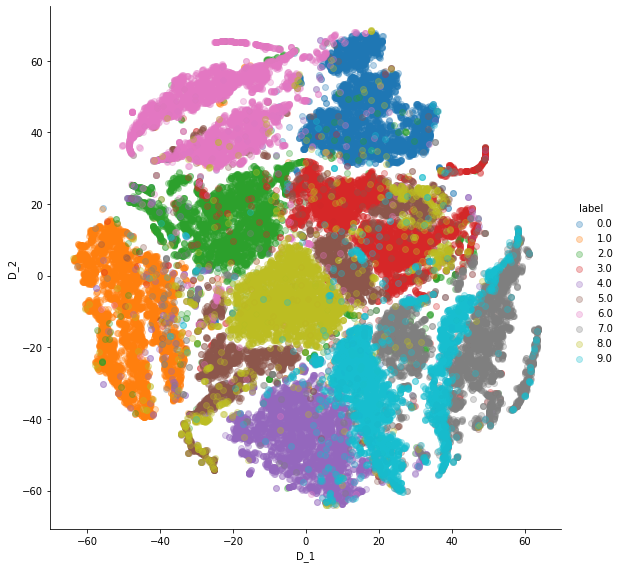

In [42]:
import numpy as np
tsne_columns = np.column_stack((tsne_mnist,labels))
tsne__mnist = pd.DataFrame(data=tsne_columns, columns=('D_1','D_2','label'))
sns.FacetGrid(tsne__mnist, hue='label',height=8).map(plt.scatter,
                                                    'D_1','D_2',alpha=0.3).add_legend()

In [49]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_mnist = pca.fit_transform(mnist)

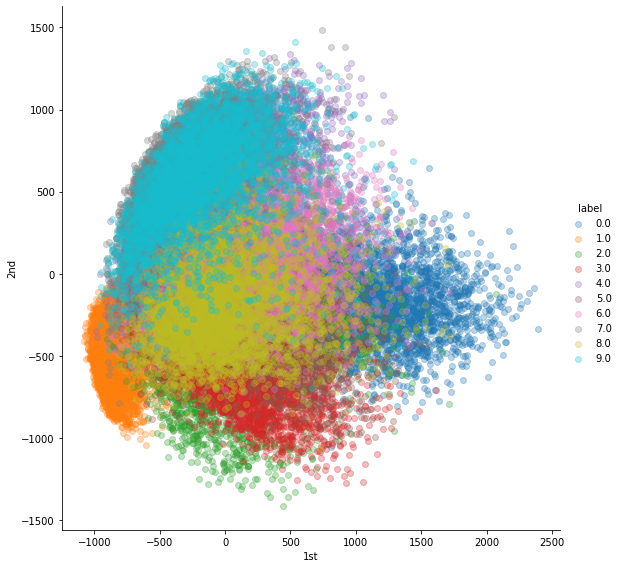

In [50]:
pca_columns = np.column_stack((pca_mnist,labels))
pca__mnist = pd.DataFrame(data=pca_columns, columns=('1st','2nd','label'))
sns.FacetGrid(pca__mnist, hue='label',height=8).map(plt.scatter,
                                                    '1st','2nd',alpha=0.3).add_legend()